In [4]:
#importing the various Python libraries / packages
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Read in the data file
data_total = pd.read_csv("Speed_Camera_Violations.csv")

In [32]:
print(type(data_total))
print(data_total.dtypes)
data_total.head()

<class 'pandas.core.frame.DataFrame'>
ADDRESS            object
CAMERA ID          object
VIOLATION DATE     object
VIOLATIONS          int64
X COORDINATE      float64
Y COORDINATE      float64
LATITUDE          float64
LONGITUDE         float64
LOCATION           object
dtype: object


,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,10318 S INDIANAPOLIS,CHI120,02/12/2016,72,1203645.368141,1837056.144574,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)"
1,1110 S PULASKI RD,CHI163,02/12/2016,19,1149841.165944,1894930.809093,41.867603,-87.725383,"(41.86760272243294, -87.7253827433152)"
2,1111 N HUMBOLDT,CHI010,02/12/2016,65,NaN,NaN,NaN,NaN,NaN
3,11144 S VINCENNES,CHI023,02/12/2016,1,1166993.613106,1830711.216507,41.691025,-87.664248,"(41.69102545584918, -87.6642476900556)"
4,11153 S VINCENNES,CHI022,02/12/2016,13,1167028.752946,1830593.601477,41.690702,-87.664122,"(41.690701951255015, -87.66412238501842)"


#### We see here that violaion date is not a datetime object in the original dataframe. We will need to convert it into a datetime object to be able to do computations on it.

In [8]:
print(data_total.shape)

(59905, 9)


#### The given dataset has a total of 59905 rows and 9 columns

In [34]:
violations_null = pd.isnull(data_total["VIOLATIONS"])
violations_null_count = violations_null.sum()
print(violations_null_count)
violation_date_null = pd.isnull(data_total["VIOLATION DATE"])
violation_date_null_count = violation_date_null.sum()
print(violation_date_null_count)

0
0


#### We see that there are no null / missing values present in VIOLATIONS and VIOLATIONS DATE column

In [35]:
unique_camera_ids= data_total["CAMERA ID"].unique()
print(len(unique_camera_ids))

150


#### A total of 150 unique camera-id's are present in the entire data set

In [36]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59905 entries, 0 to 59904
Data columns (total 9 columns):
ADDRESS           59905 non-null object
CAMERA ID         59905 non-null object
VIOLATION DATE    59905 non-null object
VIOLATIONS        59905 non-null int64
X COORDINATE      57506 non-null float64
Y COORDINATE      57506 non-null float64
LATITUDE          57506 non-null float64
LONGITUDE         57506 non-null float64
LOCATION          57506 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 4.6+ MB


In [37]:
data_total["VIOLATION DATE"].head()

0    02/12/2016
1    02/12/2016
2    02/12/2016
3    02/12/2016
4    02/12/2016
Name: VIOLATION DATE, dtype: object

#### The VIOLATION DATE is in mm/dd/yyyy format initially. Let's convert it to a date-time object.

In [38]:
data_total["VIOLATION DATE"]= pd.to_datetime(data_total["VIOLATION DATE"])
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59905 entries, 0 to 59904
Data columns (total 9 columns):
ADDRESS           59905 non-null object
CAMERA ID         59905 non-null object
VIOLATION DATE    59905 non-null datetime64[ns]
VIOLATIONS        59905 non-null int64
X COORDINATE      57506 non-null float64
Y COORDINATE      57506 non-null float64
LATITUDE          57506 non-null float64
LONGITUDE         57506 non-null float64
LOCATION          57506 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 4.6+ MB


In [39]:
data_total["VIOLATION DATE"].head()

0   2016-02-12
1   2016-02-12
2   2016-02-12
3   2016-02-12
4   2016-02-12
Name: VIOLATION DATE, dtype: datetime64[ns]

#### Now the VIOLATION DATE has been converted into a date-time object. The next step is to extract day, month and year from the date given and insert new columns in the original dataset to be able to answer the questions asked.

In [40]:
from datetime import date
import calendar
test_col=[]
test_col1=[]
test_col2=[]
for i in data_total["VIOLATION DATE"]:
    a = calendar.day_name[i.weekday()]
    b = i.month
    c = i.year
    test_col.append(a)
    test_col1.append(b)
    test_col2.append(c)
    
data_total["VIOLATION DAY"] = test_col
data_total["VIOLATION MONTH"] = test_col1
data_total["VIOLATION YEAR"] = test_col2

print(data_total["VIOLATION DAY"][0:5]) 
print(data_total["VIOLATION MONTH"][0:5])
print(data_total["VIOLATION YEAR"][0:5])
data_total.head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: VIOLATION DAY, dtype: object
0    2
1    2
2    2
3    2
4    2
Name: VIOLATION MONTH, dtype: int64
0    2016
1    2016
2    2016
3    2016
4    2016
Name: VIOLATION YEAR, dtype: int64


,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,VIOLATION DAY,VIOLATION MONTH,VIOLATION YEAR
0,10318 S INDIANAPOLIS,CHI120,2016-02-12,72,1203645.368141,1837056.144574,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)",Friday,2,2016
1,1110 S PULASKI RD,CHI163,2016-02-12,19,1149841.165944,1894930.809093,41.867603,-87.725383,"(41.86760272243294, -87.7253827433152)",Friday,2,2016
2,1111 N HUMBOLDT,CHI010,2016-02-12,65,NaN,NaN,NaN,NaN,NaN,Friday,2,2016
3,11144 S VINCENNES,CHI023,2016-02-12,1,1166993.613106,1830711.216507,41.691025,-87.664248,"(41.69102545584918, -87.6642476900556)",Friday,2,2016
4,11153 S VINCENNES,CHI022,2016-02-12,13,1167028.752946,1830593.601477,41.690702,-87.664122,"(41.690701951255015, -87.66412238501842)",Friday,2,2016


### We now have three new columns added in the original dataset - VIOLATION DAY, VIOLATION MONTH, and VIOLATION YEAR

## Question: What is the average number of citations issued per camera, per day?

#### I have answered this question by finding out the average of violations for each camera-id on a given day over the entire time-span.

In [42]:
average_citations_per_camera_per_day = data_total.groupby(["CAMERA ID","VIOLATION DAY"])["VIOLATIONS"].mean()

In [43]:
print(average_citations_per_camera_per_day[0:10])

CAMERA ID  VIOLATION DAY
CHI003     Friday           107.823529
           Monday            93.253012
           Saturday         141.261905
           Sunday           138.000000
           Thursday         104.247059
           Tuesday           89.630952
           Wednesday         90.682353
CHI004     Friday            40.011905
           Monday            33.134146
           Saturday          47.845238
Name: VIOLATIONS, dtype: float64


In [44]:
average_citations_per_camera_per_day.describe()

count    906.000000
mean      30.680760
std       34.670738
min        1.160000
25%        9.310390
50%       19.026122
75%       38.266333
max      311.179104
Name: VIOLATIONS, dtype: float64

#### From the output above, we see that for each camera-id, we have an average number of violations for each day of the week. Also, we see that the total count is 906 from 1st July 2014 until 12th Feb 2016. If we do the calculation considering seven days in a week and we have 150 unique camera ID's, the total comes out to 7 * 150 = 1050. This means that there are few days of the week when few cameras were not used for reporting violations and also, there might be new cameras which were added with time.

## Question: On which day of the week are the most citations issued?

In [45]:
count_violations_per_day = data_total.groupby(["VIOLATION DAY"])["VIOLATIONS"].count()

VIOLATION DAY
Friday       9508
Monday       9340
Saturday     5839
Sunday       5829
Thursday     9728
Tuesday      9946
Wednesday    9715
Name: VIOLATIONS, dtype: int64


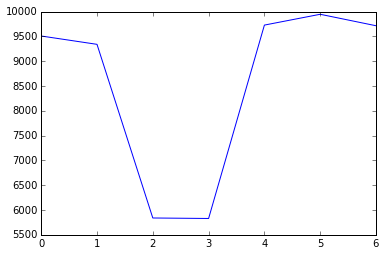

In [48]:
print(count_violations_per_day)
plt.plot(count_violations_per_day)

#### From the above output, we see that the most citations were issued on Tuesday.

## Question: Have the number of active cameras increased or decreased over the collection period?

#### I have answered this question by considering the count of unique camera-id's in each month from July 2012 until Feb 2016 (total 20 months) and then observed the pattern to see if there is an increasing or decreasing trend.

In [49]:
active_cameras_pattern = data_total.groupby(["VIOLATION YEAR","VIOLATION MONTH"])["CAMERA ID"].nunique().reset_index()

In [50]:
active_cameras_pattern

,VIOLATION YEAR,VIOLATION MONTH,CAMERA ID
0,2014,7,101
1,2014,8,75
2,2014,9,125
3,2014,10,131
4,2014,11,143
5,2014,12,143
6,2015,1,143
7,2015,2,146
8,2015,3,145
9,2015,4,146


In [26]:
active_cameras_pattern["ID"] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [27]:
active_cameras_pattern.head()

,VIOLATION YEAR,VIOLATION MONTH,CAMERA ID,ID
0,2014,7,101,1
1,2014,8,75,2
2,2014,9,125,3
3,2014,10,131,4
4,2014,11,143,5


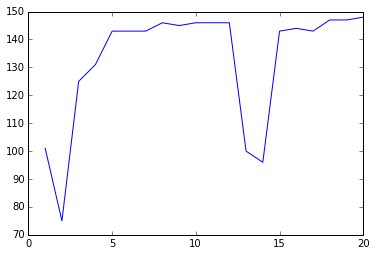

In [28]:
plt.plot(active_cameras_pattern["ID"],active_cameras_pattern["CAMERA ID"])

#### From the above output, we see that there has been an increasing (uniform / constant) trend for most of the months, except in August 2014 and August 2015, the number has gone down significantly.